In [1]:
!pip install keras

# Keras CIFAR10

## First Attempt

Imports that willbe used for the entire project. I will be creating a CNN model to classify the cifar 10 dataset.

In [2]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential

Using TensorFlow backend.


### Data Loading

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Make the labels one hot encoded
# CIFAR 10 has 10 classes
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('Training Samples {}'.format(x_train.shape[0]))
print('Test Samples {}'.format(x_test.shape[0]))

print('Input Shape = {}'.format(x_train.shape[1:]))

Training Samples 50000
Test Samples 10000
Input Shape = (32, 32, 3)


### Model Creation & Training

In [4]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape = (32, 32, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (5, 5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [5]:
batch_size = 32
epochs = 50

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
39520/50000 [======================>.......] - ETA: 4s - loss: 1.6901 - acc: 0.3902

50000/50000 [==============================] - 24s 482us/step - loss: 1.6397 - acc: 0.4085 - val_loss: 1.3932 - val_acc: 0.5079
Epoch 2/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.3148 - acc: 0.5327 - val_loss: 1.2278 - val_acc: 0.5643
Epoch 3/50
 1792/50000 [>.............................] - ETA: 20s - loss: 1.1891 - acc: 0.5798

50000/50000 [==============================] - 23s 457us/step - loss: 1.1625 - acc: 0.5913 - val_loss: 1.1204 - val_acc: 0.6119
Epoch 4/50
39008/50000 [======================>.......] - ETA: 4s - loss: 1.0608 - acc: 0.6293

50000/50000 [==============================] - 23s 457us/step - loss: 1.0551 - acc: 0.6308 - val_loss: 1.0014 - val_acc: 0.6482
Epoch 5/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.9791 - acc: 0.6591 - val_loss: 0.9613 - val_acc: 0.6719
Epoch 6/50
 1824/50000 [>.............................] - ETA: 20s - loss: 0.9457 - acc: 0.6700

50000/50000 [==============================] - 23s 456us/step - loss: 0.9178 - acc: 0.6807 - val_loss: 1.0084 - val_acc: 0.6455
Epoch 7/50
39168/50000 [======================>.......] - ETA: 4s - loss: 0.8644 - acc: 0.6997

50000/50000 [==============================] - 23s 457us/step - loss: 0.8674 - acc: 0.6994 - val_loss: 0.9522 - val_acc: 0.6711
Epoch 8/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.8235 - acc: 0.7161 - val_loss: 0.8829 - val_acc: 0.6910
Epoch 9/50
 1824/50000 [>.............................] - ETA: 21s - loss: 0.7897 - acc: 0.7182

50000/50000 [==============================] - 23s 456us/step - loss: 0.7873 - acc: 0.7278 - val_loss: 0.9547 - val_acc: 0.6666
Epoch 10/50
38880/50000 [======================>.......] - ETA: 4s - loss: 0.7526 - acc: 0.7414

50000/50000 [==============================] - 23s 455us/step - loss: 0.7504 - acc: 0.7421 - val_loss: 0.8566 - val_acc: 0.7072
Epoch 11/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.7251 - acc: 0.7502 - val_loss: 0.8902 - val_acc: 0.7046
Epoch 12/50
 1568/50000 [..............................] - ETA: 21s - loss: 0.6696 - acc: 0.7768

50000/50000 [==============================] - 23s 458us/step - loss: 0.6993 - acc: 0.7620 - val_loss: 0.8632 - val_acc: 0.7038
Epoch 13/50
38816/50000 [======================>.......] - ETA: 4s - loss: 0.6756 - acc: 0.7716

50000/50000 [==============================] - 23s 459us/step - loss: 0.6769 - acc: 0.7699 - val_loss: 0.8391 - val_acc: 0.7145
Epoch 14/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.6552 - acc: 0.7790 - val_loss: 0.8141 - val_acc: 0.7268
Epoch 15/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.6275 - acc: 0.7910

50000/50000 [==============================] - 23s 457us/step - loss: 0.6369 - acc: 0.7847 - val_loss: 0.8239 - val_acc: 0.7257
Epoch 16/50
38592/50000 [======================>.......] - ETA: 4s - loss: 0.6206 - acc: 0.7915

50000/50000 [==============================] - 23s 461us/step - loss: 0.6242 - acc: 0.7906 - val_loss: 0.8346 - val_acc: 0.7235
Epoch 17/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.6088 - acc: 0.7954 - val_loss: 0.8508 - val_acc: 0.7210
Epoch 18/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5781 - acc: 0.8049

50000/50000 [==============================] - 23s 459us/step - loss: 0.6004 - acc: 0.7987 - val_loss: 0.8625 - val_acc: 0.7210
Epoch 19/50
38720/50000 [======================>.......] - ETA: 4s - loss: 0.5921 - acc: 0.8012

50000/50000 [==============================] - 23s 460us/step - loss: 0.5920 - acc: 0.8009 - val_loss: 0.8081 - val_acc: 0.7344
Epoch 20/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.5823 - acc: 0.8042 - val_loss: 0.8785 - val_acc: 0.7291
Epoch 21/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.5785 - acc: 0.8068

50000/50000 [==============================] - 23s 459us/step - loss: 0.5734 - acc: 0.8092 - val_loss: 0.8400 - val_acc: 0.7301
Epoch 22/50
38752/50000 [======================>.......] - ETA: 4s - loss: 0.5684 - acc: 0.8127

50000/50000 [==============================] - 23s 457us/step - loss: 0.5704 - acc: 0.8115 - val_loss: 0.8134 - val_acc: 0.7341
Epoch 23/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.5666 - acc: 0.8133 - val_loss: 0.9619 - val_acc: 0.7004
Epoch 24/50
 1568/50000 [..............................] - ETA: 21s - loss: 0.5405 - acc: 0.8265

50000/50000 [==============================] - 23s 460us/step - loss: 0.5637 - acc: 0.8139 - val_loss: 0.8506 - val_acc: 0.7374
Epoch 25/50
38752/50000 [======================>.......] - ETA: 4s - loss: 0.5549 - acc: 0.8141

50000/50000 [==============================] - 23s 461us/step - loss: 0.5601 - acc: 0.8129 - val_loss: 0.8074 - val_acc: 0.7389
Epoch 26/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.5536 - acc: 0.8160 - val_loss: 0.8837 - val_acc: 0.7182
Epoch 27/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5102 - acc: 0.8285

50000/50000 [==============================] - 23s 456us/step - loss: 0.5524 - acc: 0.8156 - val_loss: 0.8598 - val_acc: 0.7310
Epoch 28/50
38720/50000 [======================>.......] - ETA: 4s - loss: 0.5433 - acc: 0.8179

50000/50000 [==============================] - 23s 458us/step - loss: 0.5475 - acc: 0.8172 - val_loss: 0.8712 - val_acc: 0.7348
Epoch 29/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.5455 - acc: 0.8184 - val_loss: 0.9613 - val_acc: 0.7234
Epoch 30/50
 1568/50000 [..............................] - ETA: 21s - loss: 0.5450 - acc: 0.8221

50000/50000 [==============================] - 23s 456us/step - loss: 0.5416 - acc: 0.8182 - val_loss: 0.8542 - val_acc: 0.7358
Epoch 31/50
38720/50000 [======================>.......] - ETA: 4s - loss: 0.5374 - acc: 0.8210

50000/50000 [==============================] - 23s 460us/step - loss: 0.5401 - acc: 0.8201 - val_loss: 0.9233 - val_acc: 0.7273
Epoch 32/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.5427 - acc: 0.8201 - val_loss: 0.9267 - val_acc: 0.7242
Epoch 33/50
 1568/50000 [..............................] - ETA: 21s - loss: 0.5597 - acc: 0.8195

50000/50000 [==============================] - 23s 459us/step - loss: 0.5376 - acc: 0.8216 - val_loss: 0.9087 - val_acc: 0.7148
Epoch 34/50
38816/50000 [======================>.......] - ETA: 4s - loss: 0.5362 - acc: 0.8216

50000/50000 [==============================] - 23s 456us/step - loss: 0.5355 - acc: 0.8221 - val_loss: 0.9797 - val_acc: 0.7041
Epoch 35/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.5386 - acc: 0.8222 - val_loss: 0.8718 - val_acc: 0.7313
Epoch 36/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5033 - acc: 0.8326

50000/50000 [==============================] - 23s 458us/step - loss: 0.5305 - acc: 0.8224 - val_loss: 1.0523 - val_acc: 0.7074
Epoch 37/50
38688/50000 [======================>.......] - ETA: 4s - loss: 0.5326 - acc: 0.8234

50000/50000 [==============================] - 23s 453us/step - loss: 0.5339 - acc: 0.8231 - val_loss: 0.9342 - val_acc: 0.7242
Epoch 38/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.5284 - acc: 0.8243 - val_loss: 0.8810 - val_acc: 0.7363
Epoch 39/50
 1568/50000 [..............................] - ETA: 21s - loss: 0.5394 - acc: 0.8227

50000/50000 [==============================] - 23s 455us/step - loss: 0.5239 - acc: 0.8269 - val_loss: 1.0065 - val_acc: 0.7186
Epoch 40/50
38656/50000 [======================>.......] - ETA: 4s - loss: 0.5270 - acc: 0.8257

50000/50000 [==============================] - 23s 457us/step - loss: 0.5253 - acc: 0.8256 - val_loss: 0.9619 - val_acc: 0.7330
Epoch 41/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.5201 - acc: 0.8263 - val_loss: 0.8833 - val_acc: 0.7293
Epoch 42/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5476 - acc: 0.8132

50000/50000 [==============================] - 23s 457us/step - loss: 0.5195 - acc: 0.8263 - val_loss: 0.9811 - val_acc: 0.7161
Epoch 43/50
38656/50000 [======================>.......] - ETA: 4s - loss: 0.5208 - acc: 0.8276

50000/50000 [==============================] - 23s 458us/step - loss: 0.5234 - acc: 0.8272 - val_loss: 0.9274 - val_acc: 0.7379
Epoch 44/50
50000/50000 [==============================] - 23s 457us/step - loss: 0.5168 - acc: 0.8293 - val_loss: 0.9075 - val_acc: 0.7299
Epoch 45/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5087 - acc: 0.8229

50000/50000 [==============================] - 23s 455us/step - loss: 0.5184 - acc: 0.8288 - val_loss: 0.9689 - val_acc: 0.7178
Epoch 46/50
38784/50000 [======================>.......] - ETA: 4s - loss: 0.5202 - acc: 0.8293

50000/50000 [==============================] - 23s 455us/step - loss: 0.5228 - acc: 0.8279 - val_loss: 0.9562 - val_acc: 0.7350
Epoch 47/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.5162 - acc: 0.8284 - val_loss: 1.0950 - val_acc: 0.7163
Epoch 48/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.5077 - acc: 0.8313

50000/50000 [==============================] - 23s 456us/step - loss: 0.5089 - acc: 0.8317 - val_loss: 0.8626 - val_acc: 0.7343
Epoch 49/50
38688/50000 [======================>.......] - ETA: 4s - loss: 0.5073 - acc: 0.8320

50000/50000 [==============================] - 23s 456us/step - loss: 0.5081 - acc: 0.8318 - val_loss: 1.0021 - val_acc: 0.7319
Epoch 50/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.5060 - acc: 0.8353 - val_loss: 1.0103 - val_acc: 0.6994


### Graphing

In [0]:
acc = history.history['acc']
loss = history.history['loss']
v_acc = history.history['val_acc']
v_loss = history.history['val_loss']

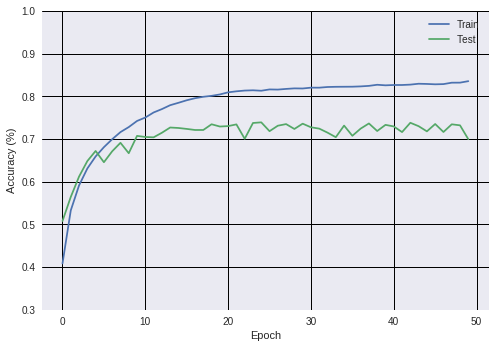

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(acc)
plt.plot(v_acc)
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 51, 10))
plt.yticks(np.arange(0.3, 1.1, 0.1))
plt.legend(['Train', 'Test'])
plt.grid(color = 'k')
plt.show()

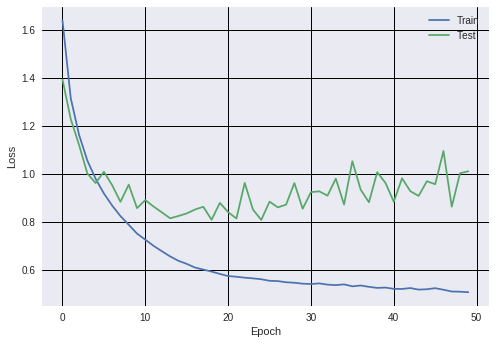

In [16]:
plt.plot(loss)
plt.plot(v_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.grid(color = 'k')
plt.show()

In [19]:
max(acc), max(v_acc)

(0.8353, 0.7389)

## Attempt 2

### Library Imports and Data Init

For this attempt, I wanted to give a shot at adding Fractional Max Pooling in Keras.

In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Make the labels one hot encoded
# CIFAR 10 has 10 classes
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('Training Samples {}'.format(x_train.shape[0]))
print('Test Samples {}'.format(x_test.shape[0]))

print('Input Shape = {}'.format(x_train.shape[1:]))

Using TensorFlow backend.


Training Samples 50000
Test Samples 10000
Input Shape = (32, 32, 3)


### Model Creation

In [2]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (8, 8), padding = 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [3]:
batch_size = 32
epochs = 150

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
29536/50000 [================>.............] - ETA: 14s - loss: 2.2007 - acc: 0.1465

50000/50000 [==============================] - 36s 712us/step - loss: 2.1134 - acc: 0.1747 - val_loss: 1.9246 - val_acc: 0.2654
Epoch 2/150
35008/50000 [====================>.........] - ETA: 9s - loss: 1.8549 - acc: 0.2842

50000/50000 [==============================] - 34s 681us/step - loss: 1.8272 - acc: 0.3009 - val_loss: 1.6444 - val_acc: 0.3838
Epoch 3/150
37056/50000 [=====================>........] - ETA: 8s - loss: 1.6752 - acc: 0.3787

50000/50000 [==============================] - 34s 681us/step - loss: 1.6568 - acc: 0.3864 - val_loss: 1.7139 - val_acc: 0.4000
Epoch 4/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.5334 - acc: 0.4339

50000/50000 [==============================] - 34s 676us/step - loss: 1.5209 - acc: 0.4402 - val_loss: 1.4649 - val_acc: 0.4715
Epoch 5/150
38112/50000 [=====================>........] - ETA: 7s - loss: 1.4312 - acc: 0.4807

50000/50000 [==============================] - 34s 676us/step - loss: 1.4257 - acc: 0.4825 - val_loss: 1.3364 - val_acc: 0.5108
Epoch 6/150
38272/50000 [=====================>........] - ETA: 7s - loss: 1.3585 - acc: 0.5094

50000/50000 [==============================] - 34s 679us/step - loss: 1.3535 - acc: 0.5108 - val_loss: 1.3347 - val_acc: 0.5185
Epoch 7/150
38176/50000 [=====================>........] - ETA: 7s - loss: 1.2907 - acc: 0.5377

50000/50000 [==============================] - 34s 679us/step - loss: 1.2868 - acc: 0.5395 - val_loss: 1.1679 - val_acc: 0.5760
Epoch 8/150
38304/50000 [=====================>........] - ETA: 7s - loss: 1.2484 - acc: 0.5554

50000/50000 [==============================] - 34s 676us/step - loss: 1.2448 - acc: 0.5571 - val_loss: 1.1739 - val_acc: 0.5826
Epoch 9/150
38240/50000 [=====================>........] - ETA: 7s - loss: 1.2083 - acc: 0.5709

50000/50000 [==============================] - 34s 679us/step - loss: 1.2035 - acc: 0.5734 - val_loss: 1.1798 - val_acc: 0.5799
Epoch 10/150
38112/50000 [=====================>........] - ETA: 7s - loss: 1.1731 - acc: 0.5841

50000/50000 [==============================] - 34s 677us/step - loss: 1.1660 - acc: 0.5864 - val_loss: 1.1222 - val_acc: 0.6050
Epoch 11/150
38112/50000 [=====================>........] - ETA: 7s - loss: 1.1339 - acc: 0.6016

50000/50000 [==============================] - 34s 676us/step - loss: 1.1300 - acc: 0.6020 - val_loss: 1.1742 - val_acc: 0.5926
Epoch 12/150
38112/50000 [=====================>........] - ETA: 7s - loss: 1.0998 - acc: 0.6128

50000/50000 [==============================] - 34s 677us/step - loss: 1.0988 - acc: 0.6142 - val_loss: 1.0541 - val_acc: 0.6322
Epoch 13/150
38048/50000 [=====================>........] - ETA: 7s - loss: 1.0743 - acc: 0.6208

50000/50000 [==============================] - 34s 675us/step - loss: 1.0749 - acc: 0.6217 - val_loss: 0.9857 - val_acc: 0.6516
Epoch 14/150
38016/50000 [=====================>........] - ETA: 7s - loss: 1.0509 - acc: 0.6329

50000/50000 [==============================] - 34s 676us/step - loss: 1.0470 - acc: 0.6335 - val_loss: 1.0499 - val_acc: 0.6350
Epoch 15/150
38048/50000 [=====================>........] - ETA: 7s - loss: 1.0248 - acc: 0.6393

50000/50000 [==============================] - 34s 678us/step - loss: 1.0259 - acc: 0.6407 - val_loss: 0.9706 - val_acc: 0.6594
Epoch 16/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0072 - acc: 0.6504

50000/50000 [==============================] - 34s 679us/step - loss: 1.0047 - acc: 0.6516 - val_loss: 0.9394 - val_acc: 0.6740
Epoch 17/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9872 - acc: 0.6552

50000/50000 [==============================] - 34s 678us/step - loss: 0.9868 - acc: 0.6560 - val_loss: 0.9703 - val_acc: 0.6602
Epoch 18/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9767 - acc: 0.6630

50000/50000 [==============================] - 34s 678us/step - loss: 0.9754 - acc: 0.6625 - val_loss: 1.0577 - val_acc: 0.6445
Epoch 19/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9647 - acc: 0.6666

50000/50000 [==============================] - 34s 674us/step - loss: 0.9641 - acc: 0.6673 - val_loss: 0.8941 - val_acc: 0.6900
Epoch 20/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9496 - acc: 0.6721

50000/50000 [==============================] - 34s 678us/step - loss: 0.9534 - acc: 0.6706 - val_loss: 0.8766 - val_acc: 0.6984
Epoch 21/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9440 - acc: 0.6784

50000/50000 [==============================] - 34s 682us/step - loss: 0.9416 - acc: 0.6791 - val_loss: 0.8468 - val_acc: 0.7070
Epoch 22/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9285 - acc: 0.6827

50000/50000 [==============================] - 34s 683us/step - loss: 0.9267 - acc: 0.6823 - val_loss: 1.0143 - val_acc: 0.6592
Epoch 23/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9183 - acc: 0.6841

50000/50000 [==============================] - 34s 681us/step - loss: 0.9172 - acc: 0.6848 - val_loss: 0.8808 - val_acc: 0.7000
Epoch 24/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9036 - acc: 0.6932

50000/50000 [==============================] - 34s 683us/step - loss: 0.9054 - acc: 0.6918 - val_loss: 1.0087 - val_acc: 0.6660
Epoch 25/150
37856/50000 [=====================>........] - ETA: 7s - loss: 0.9009 - acc: 0.6935

50000/50000 [==============================] - 34s 681us/step - loss: 0.9035 - acc: 0.6928 - val_loss: 0.8162 - val_acc: 0.7162
Epoch 26/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8966 - acc: 0.6932

50000/50000 [==============================] - 34s 680us/step - loss: 0.8942 - acc: 0.6948 - val_loss: 0.9804 - val_acc: 0.6600
Epoch 27/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8858 - acc: 0.6988

50000/50000 [==============================] - 34s 680us/step - loss: 0.8885 - acc: 0.6986 - val_loss: 0.8256 - val_acc: 0.7175
Epoch 28/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8860 - acc: 0.6993

50000/50000 [==============================] - 34s 683us/step - loss: 0.8832 - acc: 0.7009 - val_loss: 0.8806 - val_acc: 0.7038
Epoch 29/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8741 - acc: 0.7052

50000/50000 [==============================] - 34s 683us/step - loss: 0.8783 - acc: 0.7024 - val_loss: 0.8186 - val_acc: 0.7165
Epoch 30/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.8654 - acc: 0.7079

50000/50000 [==============================] - 34s 680us/step - loss: 0.8676 - acc: 0.7084 - val_loss: 0.7899 - val_acc: 0.7321
Epoch 31/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8605 - acc: 0.7091

50000/50000 [==============================] - 34s 678us/step - loss: 0.8652 - acc: 0.7084 - val_loss: 0.8713 - val_acc: 0.7113
Epoch 32/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8552 - acc: 0.7116

50000/50000 [==============================] - 34s 676us/step - loss: 0.8564 - acc: 0.7103 - val_loss: 0.7886 - val_acc: 0.7312
Epoch 33/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.8469 - acc: 0.7149

50000/50000 [==============================] - 34s 679us/step - loss: 0.8535 - acc: 0.7126 - val_loss: 0.9352 - val_acc: 0.6884
Epoch 34/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8495 - acc: 0.7112

50000/50000 [==============================] - 34s 677us/step - loss: 0.8518 - acc: 0.7127 - val_loss: 0.8233 - val_acc: 0.7275
Epoch 35/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8441 - acc: 0.7165

50000/50000 [==============================] - 34s 676us/step - loss: 0.8467 - acc: 0.7153 - val_loss: 0.7948 - val_acc: 0.7352
Epoch 36/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8449 - acc: 0.7157

50000/50000 [==============================] - 34s 677us/step - loss: 0.8452 - acc: 0.7167 - val_loss: 0.8377 - val_acc: 0.7157
Epoch 37/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8443 - acc: 0.7183

50000/50000 [==============================] - 34s 678us/step - loss: 0.8469 - acc: 0.7164 - val_loss: 1.0290 - val_acc: 0.6644
Epoch 38/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8474 - acc: 0.7181

50000/50000 [==============================] - 34s 674us/step - loss: 0.8464 - acc: 0.7190 - val_loss: 0.9029 - val_acc: 0.7036
Epoch 39/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8444 - acc: 0.7209

50000/50000 [==============================] - 34s 677us/step - loss: 0.8492 - acc: 0.7199 - val_loss: 0.7698 - val_acc: 0.7484
Epoch 40/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8390 - acc: 0.7203

50000/50000 [==============================] - 34s 677us/step - loss: 0.8370 - acc: 0.7210 - val_loss: 0.8530 - val_acc: 0.7208
Epoch 41/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8340 - acc: 0.7236

50000/50000 [==============================] - 34s 680us/step - loss: 0.8370 - acc: 0.7217 - val_loss: 0.7914 - val_acc: 0.7337
Epoch 42/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.8328 - acc: 0.7232

50000/50000 [==============================] - 34s 682us/step - loss: 0.8390 - acc: 0.7223 - val_loss: 0.7275 - val_acc: 0.7525
Epoch 43/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8402 - acc: 0.7235

50000/50000 [==============================] - 34s 683us/step - loss: 0.8430 - acc: 0.7227 - val_loss: 0.7888 - val_acc: 0.7401
Epoch 44/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8384 - acc: 0.7231

50000/50000 [==============================] - 34s 682us/step - loss: 0.8428 - acc: 0.7212 - val_loss: 0.8238 - val_acc: 0.7242
Epoch 45/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8414 - acc: 0.7237

50000/50000 [==============================] - 34s 683us/step - loss: 0.8440 - acc: 0.7219 - val_loss: 0.7913 - val_acc: 0.7409
Epoch 46/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.8427 - acc: 0.7257

50000/50000 [==============================] - 34s 682us/step - loss: 0.8471 - acc: 0.7239 - val_loss: 0.7624 - val_acc: 0.7461
Epoch 47/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8468 - acc: 0.7247

50000/50000 [==============================] - 34s 680us/step - loss: 0.8475 - acc: 0.7238 - val_loss: 0.8586 - val_acc: 0.7141
Epoch 48/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8454 - acc: 0.7251

50000/50000 [==============================] - 34s 679us/step - loss: 0.8460 - acc: 0.7250 - val_loss: 0.8503 - val_acc: 0.7221
Epoch 49/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8401 - acc: 0.7268

50000/50000 [==============================] - 34s 676us/step - loss: 0.8393 - acc: 0.7263 - val_loss: 0.8409 - val_acc: 0.7336
Epoch 50/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8469 - acc: 0.7229

50000/50000 [==============================] - 34s 677us/step - loss: 0.8473 - acc: 0.7234 - val_loss: 0.7535 - val_acc: 0.7495
Epoch 51/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8532 - acc: 0.7261

50000/50000 [==============================] - 34s 674us/step - loss: 0.8563 - acc: 0.7242 - val_loss: 0.8045 - val_acc: 0.7279
Epoch 52/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8636 - acc: 0.7230

50000/50000 [==============================] - 34s 678us/step - loss: 0.8637 - acc: 0.7227 - val_loss: 0.8012 - val_acc: 0.7408
Epoch 53/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8738 - acc: 0.7203

50000/50000 [==============================] - 34s 678us/step - loss: 0.8717 - acc: 0.7205 - val_loss: 0.7931 - val_acc: 0.7344
Epoch 54/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.8603 - acc: 0.7229

50000/50000 [==============================] - 34s 679us/step - loss: 0.8656 - acc: 0.7210 - val_loss: 0.9767 - val_acc: 0.6983
Epoch 55/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.8654 - acc: 0.7206

50000/50000 [==============================] - 34s 678us/step - loss: 0.8663 - acc: 0.7210 - val_loss: 0.8055 - val_acc: 0.7299
Epoch 56/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.8680 - acc: 0.7195

50000/50000 [==============================] - 34s 677us/step - loss: 0.8720 - acc: 0.7184 - val_loss: 0.7414 - val_acc: 0.7628
Epoch 57/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8887 - acc: 0.7161

50000/50000 [==============================] - 34s 676us/step - loss: 0.8924 - acc: 0.7145 - val_loss: 0.7972 - val_acc: 0.7411
Epoch 58/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.8861 - acc: 0.7173

50000/50000 [==============================] - 34s 683us/step - loss: 0.8894 - acc: 0.7161 - val_loss: 0.7542 - val_acc: 0.7506
Epoch 59/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9022 - acc: 0.7120

50000/50000 [==============================] - 34s 679us/step - loss: 0.8963 - acc: 0.7141 - val_loss: 0.8815 - val_acc: 0.7172
Epoch 60/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.8936 - acc: 0.7143

50000/50000 [==============================] - 34s 681us/step - loss: 0.8954 - acc: 0.7131 - val_loss: 0.8252 - val_acc: 0.7368
Epoch 61/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9056 - acc: 0.7124

50000/50000 [==============================] - 34s 680us/step - loss: 0.9023 - acc: 0.7135 - val_loss: 0.7960 - val_acc: 0.7343
Epoch 62/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9106 - acc: 0.7107

50000/50000 [==============================] - 34s 681us/step - loss: 0.9131 - acc: 0.7096 - val_loss: 0.7674 - val_acc: 0.7406
Epoch 63/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9117 - acc: 0.7091

50000/50000 [==============================] - 34s 681us/step - loss: 0.9132 - acc: 0.7089 - val_loss: 0.8578 - val_acc: 0.7202
Epoch 64/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9223 - acc: 0.7112

50000/50000 [==============================] - 34s 680us/step - loss: 0.9216 - acc: 0.7109 - val_loss: 0.8274 - val_acc: 0.7275
Epoch 65/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9415 - acc: 0.7038

50000/50000 [==============================] - 34s 681us/step - loss: 0.9444 - acc: 0.7037 - val_loss: 0.9384 - val_acc: 0.6902
Epoch 66/150
37856/50000 [=====================>........] - ETA: 7s - loss: 0.9414 - acc: 0.7035

50000/50000 [==============================] - 34s 682us/step - loss: 0.9394 - acc: 0.7042 - val_loss: 0.8440 - val_acc: 0.7178
Epoch 67/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9408 - acc: 0.7036

50000/50000 [==============================] - 34s 679us/step - loss: 0.9406 - acc: 0.7045 - val_loss: 0.9679 - val_acc: 0.6877
Epoch 68/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9471 - acc: 0.7021

50000/50000 [==============================] - 34s 677us/step - loss: 0.9494 - acc: 0.7014 - val_loss: 0.9631 - val_acc: 0.7104
Epoch 69/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9444 - acc: 0.6998

50000/50000 [==============================] - 34s 675us/step - loss: 0.9430 - acc: 0.7003 - val_loss: 1.1084 - val_acc: 0.6769
Epoch 70/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9542 - acc: 0.7002

50000/50000 [==============================] - 34s 680us/step - loss: 0.9566 - acc: 0.6983 - val_loss: 0.9593 - val_acc: 0.7272
Epoch 71/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9747 - acc: 0.6986

50000/50000 [==============================] - 34s 678us/step - loss: 0.9726 - acc: 0.6979 - val_loss: 1.1926 - val_acc: 0.6489
Epoch 72/150
38016/50000 [=====================>........] - ETA: 7s - loss: 0.9691 - acc: 0.6993

50000/50000 [==============================] - 34s 677us/step - loss: 0.9708 - acc: 0.6971 - val_loss: 0.9940 - val_acc: 0.6873
Epoch 73/150
38048/50000 [=====================>........] - ETA: 7s - loss: 0.9833 - acc: 0.6927

50000/50000 [==============================] - 34s 677us/step - loss: 0.9835 - acc: 0.6924 - val_loss: 0.8271 - val_acc: 0.7264
Epoch 74/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9816 - acc: 0.6942

50000/50000 [==============================] - 34s 681us/step - loss: 0.9835 - acc: 0.6921 - val_loss: 0.8207 - val_acc: 0.7471
Epoch 75/150
37984/50000 [=====================>........] - ETA: 7s - loss: 0.9821 - acc: 0.6940

50000/50000 [==============================] - 34s 682us/step - loss: 0.9844 - acc: 0.6921 - val_loss: 0.8551 - val_acc: 0.7286
Epoch 76/150
37952/50000 [=====================>........] - ETA: 7s - loss: 0.9896 - acc: 0.6895

50000/50000 [==============================] - 34s 681us/step - loss: 0.9923 - acc: 0.6895 - val_loss: 0.9632 - val_acc: 0.6776
Epoch 77/150
37856/50000 [=====================>........] - ETA: 7s - loss: 1.0002 - acc: 0.6895

50000/50000 [==============================] - 34s 681us/step - loss: 1.0018 - acc: 0.6886 - val_loss: 1.0446 - val_acc: 0.6579
Epoch 78/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0200 - acc: 0.6837

50000/50000 [==============================] - 34s 681us/step - loss: 1.0166 - acc: 0.6849 - val_loss: 0.9367 - val_acc: 0.6975
Epoch 79/150
37920/50000 [=====================>........] - ETA: 7s - loss: 1.0211 - acc: 0.6803

50000/50000 [==============================] - 34s 680us/step - loss: 1.0219 - acc: 0.6815 - val_loss: 0.8958 - val_acc: 0.7139
Epoch 80/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.0400 - acc: 0.6849

50000/50000 [==============================] - 34s 682us/step - loss: 1.0330 - acc: 0.6857 - val_loss: 1.0058 - val_acc: 0.7220
Epoch 81/150
37920/50000 [=====================>........] - ETA: 7s - loss: 1.0396 - acc: 0.6809

50000/50000 [==============================] - 34s 680us/step - loss: 1.0403 - acc: 0.6809 - val_loss: 0.9351 - val_acc: 0.7062
Epoch 82/150
38016/50000 [=====================>........] - ETA: 7s - loss: 1.0313 - acc: 0.6793

50000/50000 [==============================] - 34s 678us/step - loss: 1.0359 - acc: 0.6792 - val_loss: 0.9015 - val_acc: 0.7139
Epoch 83/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0361 - acc: 0.6811

50000/50000 [==============================] - 34s 680us/step - loss: 1.0436 - acc: 0.6808 - val_loss: 1.0725 - val_acc: 0.6562
Epoch 84/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.0388 - acc: 0.6770

50000/50000 [==============================] - 34s 682us/step - loss: 1.0419 - acc: 0.6755 - val_loss: 0.8853 - val_acc: 0.7037
Epoch 85/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.0417 - acc: 0.6808

50000/50000 [==============================] - 34s 678us/step - loss: 1.0481 - acc: 0.6780 - val_loss: 0.8917 - val_acc: 0.7184
Epoch 86/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0657 - acc: 0.6730

50000/50000 [==============================] - 34s 676us/step - loss: 1.0610 - acc: 0.6738 - val_loss: 1.3232 - val_acc: 0.5929
Epoch 87/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0641 - acc: 0.6769

50000/50000 [==============================] - 34s 676us/step - loss: 1.0639 - acc: 0.6763 - val_loss: 0.8403 - val_acc: 0.7244
Epoch 88/150
37920/50000 [=====================>........] - ETA: 7s - loss: 1.0746 - acc: 0.6715

50000/50000 [==============================] - 34s 677us/step - loss: 1.0770 - acc: 0.6715 - val_loss: 0.8467 - val_acc: 0.7357
Epoch 89/150
38016/50000 [=====================>........] - ETA: 7s - loss: 1.0676 - acc: 0.6724

50000/50000 [==============================] - 34s 677us/step - loss: 1.0676 - acc: 0.6728 - val_loss: 1.4372 - val_acc: 0.6094
Epoch 90/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0727 - acc: 0.6737

50000/50000 [==============================] - 34s 676us/step - loss: 1.0732 - acc: 0.6735 - val_loss: 1.0919 - val_acc: 0.6836
Epoch 91/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.0860 - acc: 0.6680

50000/50000 [==============================] - 34s 679us/step - loss: 1.0936 - acc: 0.6652 - val_loss: 0.8940 - val_acc: 0.7138
Epoch 92/150
38016/50000 [=====================>........] - ETA: 7s - loss: 1.1151 - acc: 0.6664

50000/50000 [==============================] - 34s 677us/step - loss: 1.1143 - acc: 0.6631 - val_loss: 1.0685 - val_acc: 0.6501
Epoch 93/150
38016/50000 [=====================>........] - ETA: 7s - loss: 1.1136 - acc: 0.6593

50000/50000 [==============================] - 34s 675us/step - loss: 1.1133 - acc: 0.6582 - val_loss: 1.0858 - val_acc: 0.6519
Epoch 94/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.1012 - acc: 0.6640

50000/50000 [==============================] - 34s 685us/step - loss: 1.1087 - acc: 0.6626 - val_loss: 0.9718 - val_acc: 0.7055
Epoch 95/150
37920/50000 [=====================>........] - ETA: 7s - loss: 1.1190 - acc: 0.6584

50000/50000 [==============================] - 34s 680us/step - loss: 1.1216 - acc: 0.6597 - val_loss: 1.0038 - val_acc: 0.6866
Epoch 96/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.1270 - acc: 0.6596

50000/50000 [==============================] - 34s 679us/step - loss: 1.1218 - acc: 0.6598 - val_loss: 1.0006 - val_acc: 0.6597
Epoch 97/150
37984/50000 [=====================>........] - ETA: 7s - loss: 1.0977 - acc: 0.6625

50000/50000 [==============================] - 34s 679us/step - loss: 1.1143 - acc: 0.6594 - val_loss: 0.9453 - val_acc: 0.6969
Epoch 98/150
37952/50000 [=====================>........] - ETA: 7s - loss: 1.1416 - acc: 0.6565

50000/50000 [==============================] - 34s 682us/step - loss: 1.1354 - acc: 0.6575 - val_loss: 1.0923 - val_acc: 0.6308
Epoch 99/150
37920/50000 [=====================>........] - ETA: 7s - loss: 1.1409 - acc: 0.6548

50000/50000 [==============================] - 34s 681us/step - loss: 1.1325 - acc: 0.6558 - val_loss: 0.9772 - val_acc: 0.6705
Epoch 100/150
37856/50000 [=====================>........] - ETA: 7s - loss: 1.1428 - acc: 0.6553

50000/50000 [==============================] - 34s 680us/step - loss: 1.1451 - acc: 0.6540 - val_loss: 1.0666 - val_acc: 0.6654
Epoch 101/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.1420 - acc: 0.6506

50000/50000 [==============================] - 34s 678us/step - loss: 1.1482 - acc: 0.6486 - val_loss: 1.0085 - val_acc: 0.6571
Epoch 102/150
37792/50000 [=====================>........] - ETA: 7s - loss: 1.1259 - acc: 0.6569

50000/50000 [==============================] - 34s 677us/step - loss: 1.1350 - acc: 0.6558 - val_loss: 1.2551 - val_acc: 0.6032
Epoch 103/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.1447 - acc: 0.6506

50000/50000 [==============================] - 34s 677us/step - loss: 1.1555 - acc: 0.6503 - val_loss: 0.8509 - val_acc: 0.7141
Epoch 104/150
37824/50000 [=====================>........] - ETA: 7s - loss: 1.1849 - acc: 0.6467

50000/50000 [==============================] - 34s 680us/step - loss: 1.1797 - acc: 0.6460 - val_loss: 0.8854 - val_acc: 0.7142
Epoch 105/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.1739 - acc: 0.6431

50000/50000 [==============================] - 34s 679us/step - loss: 1.1725 - acc: 0.6421 - val_loss: 1.1924 - val_acc: 0.6668
Epoch 106/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.2037 - acc: 0.6432

50000/50000 [==============================] - 34s 682us/step - loss: 1.2059 - acc: 0.6431 - val_loss: 0.8729 - val_acc: 0.7213
Epoch 107/150
37824/50000 [=====================>........] - ETA: 7s - loss: 1.1814 - acc: 0.6450

50000/50000 [==============================] - 34s 676us/step - loss: 1.1945 - acc: 0.6450 - val_loss: 1.1364 - val_acc: 0.6577
Epoch 108/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.1992 - acc: 0.6406

50000/50000 [==============================] - 34s 676us/step - loss: 1.1961 - acc: 0.6403 - val_loss: 0.9880 - val_acc: 0.6754
Epoch 109/150
37664/50000 [=====================>........] - ETA: 7s - loss: 1.1779 - acc: 0.6419

50000/50000 [==============================] - 34s 675us/step - loss: 1.2389 - acc: 0.6365 - val_loss: 1.0114 - val_acc: 0.6934
Epoch 110/150
37664/50000 [=====================>........] - ETA: 7s - loss: 1.2058 - acc: 0.6342

50000/50000 [==============================] - 34s 679us/step - loss: 1.2045 - acc: 0.6344 - val_loss: 1.1350 - val_acc: 0.6507
Epoch 111/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.2247 - acc: 0.6341

50000/50000 [==============================] - 34s 676us/step - loss: 1.2241 - acc: 0.6344 - val_loss: 1.0581 - val_acc: 0.6651
Epoch 112/150
37792/50000 [=====================>........] - ETA: 7s - loss: 1.2378 - acc: 0.6304

50000/50000 [==============================] - 34s 682us/step - loss: 1.2406 - acc: 0.6285 - val_loss: 1.0976 - val_acc: 0.6476
Epoch 113/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.2198 - acc: 0.6273

50000/50000 [==============================] - 34s 679us/step - loss: 1.2275 - acc: 0.6253 - val_loss: 0.9485 - val_acc: 0.6934
Epoch 114/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.2426 - acc: 0.6301

50000/50000 [==============================] - 34s 679us/step - loss: 1.2528 - acc: 0.6291 - val_loss: 1.0471 - val_acc: 0.6631
Epoch 115/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.2298 - acc: 0.6221

50000/50000 [==============================] - 34s 681us/step - loss: 1.2428 - acc: 0.6213 - val_loss: 1.7537 - val_acc: 0.5748
Epoch 116/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.2464 - acc: 0.6252

50000/50000 [==============================] - 34s 680us/step - loss: 1.2442 - acc: 0.6234 - val_loss: 1.1507 - val_acc: 0.6209
Epoch 117/150
37632/50000 [=====================>........] - ETA: 7s - loss: 1.2693 - acc: 0.6234

50000/50000 [==============================] - 34s 679us/step - loss: 1.2709 - acc: 0.6220 - val_loss: 0.9892 - val_acc: 0.6696
Epoch 118/150
37632/50000 [=====================>........] - ETA: 7s - loss: 1.2796 - acc: 0.6185

50000/50000 [==============================] - 34s 680us/step - loss: 1.2887 - acc: 0.6184 - val_loss: 1.2867 - val_acc: 0.6010
Epoch 119/150
37664/50000 [=====================>........] - ETA: 7s - loss: 1.2978 - acc: 0.6140

50000/50000 [==============================] - 34s 677us/step - loss: 1.3090 - acc: 0.6173 - val_loss: 0.9115 - val_acc: 0.7105
Epoch 120/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.2785 - acc: 0.6159

50000/50000 [==============================] - 34s 677us/step - loss: 1.2907 - acc: 0.6145 - val_loss: 1.1109 - val_acc: 0.6407
Epoch 121/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.2909 - acc: 0.6124

50000/50000 [==============================] - 34s 677us/step - loss: 1.2939 - acc: 0.6122 - val_loss: 1.1636 - val_acc: 0.6092
Epoch 122/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.2949 - acc: 0.6087

50000/50000 [==============================] - 34s 679us/step - loss: 1.2982 - acc: 0.6061 - val_loss: 1.1248 - val_acc: 0.6288
Epoch 123/150
37632/50000 [=====================>........] - ETA: 7s - loss: 1.3270 - acc: 0.6106

50000/50000 [==============================] - 34s 675us/step - loss: 1.3254 - acc: 0.6082 - val_loss: 1.1848 - val_acc: 0.5985
Epoch 124/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.3222 - acc: 0.6045

50000/50000 [==============================] - 34s 678us/step - loss: 1.3158 - acc: 0.6043 - val_loss: 1.0507 - val_acc: 0.6529
Epoch 125/150
37600/50000 [=====================>........] - ETA: 7s - loss: 1.3027 - acc: 0.6067

50000/50000 [==============================] - 34s 677us/step - loss: 1.3180 - acc: 0.6013 - val_loss: 1.1162 - val_acc: 0.6294
Epoch 126/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.3315 - acc: 0.5956

50000/50000 [==============================] - 34s 675us/step - loss: 1.3439 - acc: 0.5922 - val_loss: 1.1497 - val_acc: 0.6269
Epoch 127/150
37792/50000 [=====================>........] - ETA: 7s - loss: 1.3398 - acc: 0.5961

50000/50000 [==============================] - 34s 677us/step - loss: 1.3339 - acc: 0.5958 - val_loss: 1.1570 - val_acc: 0.6114
Epoch 128/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.3542 - acc: 0.5953

50000/50000 [==============================] - 34s 677us/step - loss: 1.3672 - acc: 0.5920 - val_loss: 1.4218 - val_acc: 0.5824
Epoch 129/150
37856/50000 [=====================>........] - ETA: 7s - loss: 1.2868 - acc: 0.5991

50000/50000 [==============================] - 34s 675us/step - loss: 1.3066 - acc: 0.5961 - val_loss: 1.2171 - val_acc: 0.6317
Epoch 130/150
37792/50000 [=====================>........] - ETA: 7s - loss: 1.3485 - acc: 0.5961

50000/50000 [==============================] - 34s 679us/step - loss: 1.3619 - acc: 0.5951 - val_loss: 1.0871 - val_acc: 0.6408
Epoch 131/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.3504 - acc: 0.5904

50000/50000 [==============================] - 34s 681us/step - loss: 1.3452 - acc: 0.5904 - val_loss: 1.2953 - val_acc: 0.6014
Epoch 132/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.3502 - acc: 0.5922

50000/50000 [==============================] - 34s 681us/step - loss: 1.3494 - acc: 0.5923 - val_loss: 1.1032 - val_acc: 0.6248
Epoch 133/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.3330 - acc: 0.5928

50000/50000 [==============================] - 34s 680us/step - loss: 1.3472 - acc: 0.5866 - val_loss: 1.0308 - val_acc: 0.6534
Epoch 134/150
37632/50000 [=====================>........] - ETA: 8s - loss: 1.3782 - acc: 0.5863

50000/50000 [==============================] - 34s 684us/step - loss: 1.3766 - acc: 0.5884 - val_loss: 1.2777 - val_acc: 0.5879
Epoch 135/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.3867 - acc: 0.5798

50000/50000 [==============================] - 34s 680us/step - loss: 1.3927 - acc: 0.5791 - val_loss: 1.3928 - val_acc: 0.5404
Epoch 136/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.3872 - acc: 0.5788

50000/50000 [==============================] - 34s 680us/step - loss: 1.3835 - acc: 0.5805 - val_loss: 1.4177 - val_acc: 0.5419
Epoch 137/150
37632/50000 [=====================>........] - ETA: 7s - loss: 1.4019 - acc: 0.5695

50000/50000 [==============================] - 34s 681us/step - loss: 1.3843 - acc: 0.5751 - val_loss: 1.0641 - val_acc: 0.6442
Epoch 138/150
37696/50000 [=====================>........] - ETA: 7s - loss: 1.4397 - acc: 0.5696

50000/50000 [==============================] - 34s 680us/step - loss: 1.4228 - acc: 0.5678 - val_loss: 1.5878 - val_acc: 0.5908
Epoch 139/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.4177 - acc: 0.5689

50000/50000 [==============================] - 34s 681us/step - loss: 1.4378 - acc: 0.5658 - val_loss: 1.3784 - val_acc: 0.5300
Epoch 140/150
37664/50000 [=====================>........] - ETA: 7s - loss: 1.4109 - acc: 0.5697

50000/50000 [==============================] - 34s 682us/step - loss: 1.3915 - acc: 0.5751 - val_loss: 1.2613 - val_acc: 0.5789
Epoch 141/150
37568/50000 [=====================>........] - ETA: 8s - loss: 1.4367 - acc: 0.5707

50000/50000 [==============================] - 34s 681us/step - loss: 1.4315 - acc: 0.5691 - val_loss: 1.2417 - val_acc: 0.5839
Epoch 142/150
37600/50000 [=====================>........] - ETA: 8s - loss: 1.4545 - acc: 0.5655

50000/50000 [==============================] - 34s 683us/step - loss: 1.4578 - acc: 0.5664 - val_loss: 1.2030 - val_acc: 0.6263
Epoch 143/150
37632/50000 [=====================>........] - ETA: 7s - loss: 1.4714 - acc: 0.5674

50000/50000 [==============================] - 34s 679us/step - loss: 1.4503 - acc: 0.5696 - val_loss: 1.2826 - val_acc: 0.6242
Epoch 144/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.4501 - acc: 0.5644

50000/50000 [==============================] - 34s 681us/step - loss: 1.4410 - acc: 0.5630 - val_loss: 1.1798 - val_acc: 0.6178
Epoch 145/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.4212 - acc: 0.5565

50000/50000 [==============================] - 34s 679us/step - loss: 1.4231 - acc: 0.5551 - val_loss: 1.0838 - val_acc: 0.6552
Epoch 146/150
37856/50000 [=====================>........] - ETA: 7s - loss: 1.4681 - acc: 0.5536

50000/50000 [==============================] - 34s 679us/step - loss: 1.4682 - acc: 0.5523 - val_loss: 1.2183 - val_acc: 0.6016
Epoch 147/150
37824/50000 [=====================>........] - ETA: 7s - loss: 1.4675 - acc: 0.5595

50000/50000 [==============================] - 34s 680us/step - loss: 1.4897 - acc: 0.5558 - val_loss: 1.1589 - val_acc: 0.6173
Epoch 148/150
37728/50000 [=====================>........] - ETA: 7s - loss: 1.4607 - acc: 0.5526

50000/50000 [==============================] - 34s 681us/step - loss: 1.4737 - acc: 0.5503 - val_loss: 1.3479 - val_acc: 0.5744
Epoch 149/150
37760/50000 [=====================>........] - ETA: 7s - loss: 1.5201 - acc: 0.5362

50000/50000 [==============================] - 34s 681us/step - loss: 1.5176 - acc: 0.5353 - val_loss: 1.4514 - val_acc: 0.5446
Epoch 150/150
37600/50000 [=====================>........] - ETA: 7s - loss: 1.4783 - acc: 0.5395

50000/50000 [==============================] - 34s 678us/step - loss: 1.4671 - acc: 0.5433 - val_loss: 1.6001 - val_acc: 0.4972


In [0]:
acc_v2 = history.history['acc']
v_acc_v2 = history.history['val_acc']
loss_v2 = history.history['loss']
v_loss_v2 = history.history['val_loss']

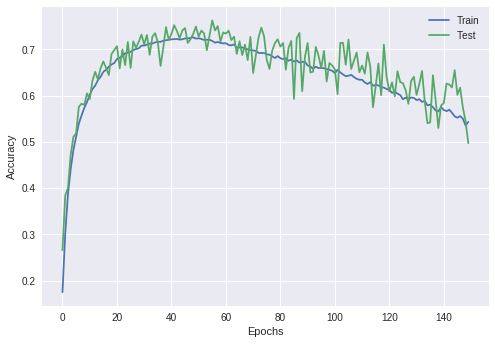

In [5]:
import matplotlib.pyplot as plt

plt.plot(acc_v2)
plt.plot(v_acc_v2)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

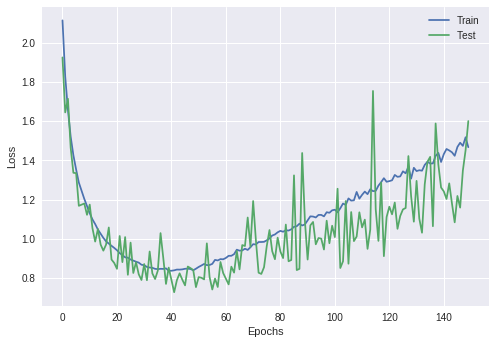

In [6]:
plt.plot(loss_v2)
plt.plot(v_loss_v2)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()